In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("PositiveCase.xlsx")

In [3]:
data

,Date,New_Positive
0,2020-03-02,2
1,2020-03-03,0
2,2020-03-04,0
3,2020-03-05,0
4,2020-03-06,2
...,...,...
754,2022-03-27,3077
755,2022-03-28,2798
756,2022-03-29,3895
757,2022-03-30,3840


In [4]:
data.drop(columns='Date',inplace=True)
data.head()

,New_Positive
0,2
1,0
2,0
3,0
4,2


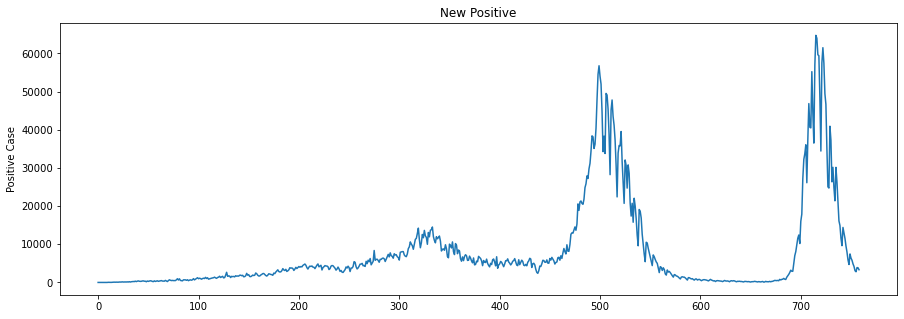

In [5]:
plt.figure(figsize=(15,5));
plt.plot(data.index,data['New_Positive']);
plt.ylabel('Positive Case');
plt.title('New Positive');
plt.plot();

In [6]:
data

,New_Positive
0,2
1,0
2,0
3,0
4,2
...,...
754,3077
755,2798
756,3895
757,3840


# Check for Stationarity in Varians

In [7]:
from scipy.stats import bartlett
import pingouin
from scipy.stats import levene

In [8]:
train1=data.iloc[:-152]
test1=data.iloc[-152:]
print(train1.shape,test1.shape)

(607, 1) (152, 1)


In [9]:
bartlett(train1.New_Positive,test1.New_Positive)

BartlettResult(statistic=109.19706599292341, pvalue=1.4692747110566538e-25)

In [10]:
stat, p = bartlett(train1.New_Positive,test1.New_Positive)
p

1.4692747110566538e-25

karena pvalue < 0.05 maka tidak stasioner terhadap varians. 

Text(0.5, 1.0, 'Probplot against normal distribution')

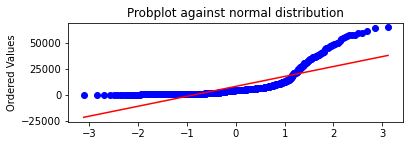

In [11]:
# box-cox transformation
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(data.New_Positive, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')



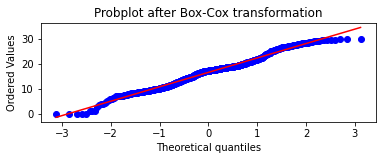

In [12]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
xt, lmbda = stats.yeojohnson(data.New_Positive)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [13]:
df=pd.DataFrame(xt,columns=['New_Positive'])

In [14]:
train=df.iloc[:-152]
test=df.iloc[-152:]
print(train.shape,test.shape)

(607, 1) (152, 1)


In [15]:
bartlett(train.New_Positive,test.New_Positive)

BartlettResult(statistic=38.35884443577769, pvalue=5.88607171897146e-10)

In [16]:
stat, p = bartlett(train.New_Positive,test.New_Positive)
p

5.88607171897146e-10

karena pvalue < 0.05 maka tidak stasioner terhadap varians. 

# Check for Stationarity in Means

In [17]:
from statsmodels.tsa.stattools import kpss
# result = adfuller(df.New_Positive)
def adfuller(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'ADF Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

adfuller(df.New_Positive)

ADF Statistic: 0.926185222600581
p-value: 0.01
num lags: 17
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Bryan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


If p< 0.05  Data is stationary ;
if p>0.05 Data is not stationary

    Because P-value< 0.05 Data is Stationary

In [18]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df.New_Positive, regression='ct')

KPSS Statistic: 0.4176322997804273
p-value: 0.01
num lags: 17
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


C:\Users\Bryan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# ACF N PACF

C:\Users\Bryan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


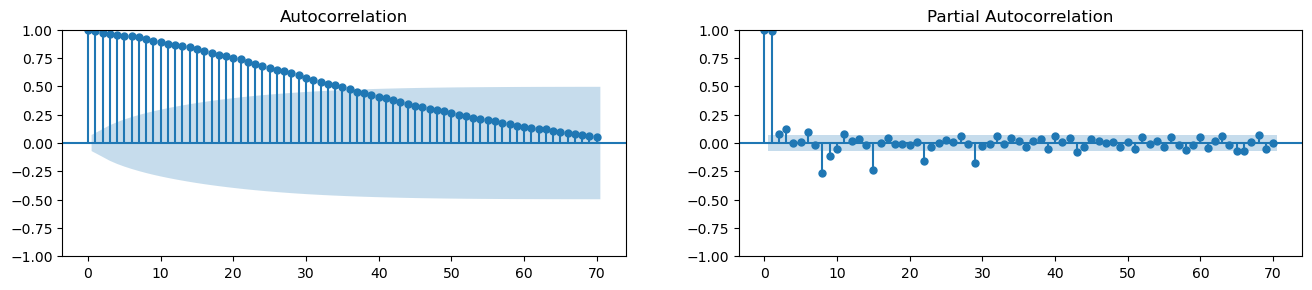

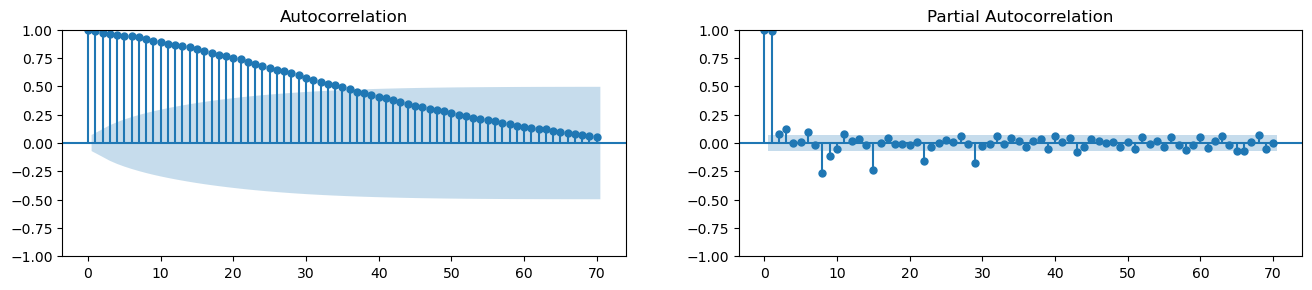

In [19]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.New_Positive.tolist(), lags=70, ax=axes[0])
plot_pacf(df.New_Positive.tolist(), lags=70, ax=axes[1])

# Training and Testing

In [20]:
train=df.iloc[:-152]
test=df.iloc[-152:]
print(train.shape,test.shape)

(609, 1) (150, 1)


In [21]:
test

,New_Positive
609,11.101057
610,11.855706
611,11.172033
612,10.649398
613,9.978914
...,...
754,16.151996
755,15.817682
756,17.003113
757,16.950866


# ARIMA

In [22]:
import statsmodels.tsa
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model1 = ARIMA(train, order=(2,0,0))
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:           New_Positive   No. Observations:                  609
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -670.469
Date:                Wed, 13 Jul 2022   AIC                           1348.937
Time:                        23:53:45   BIC                           1366.585
Sample:                             0   HQIC                          1355.802
                                - 609                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0504      4.661      2.371      0.018       1.914      20.187
ar.L1          0.7900      0.033     23.799      0.000       0.725       0.855
ar.L2          0.2061      0.033      6.305      0.0

In [39]:
from scipy.special import boxcox, inv_boxcox
fc = model_fit1.forecast(152, alpha=0.05)  # 95% conf
a=inv_boxcox(fc, 0.15755564452074813)

In [42]:
a

609    427.298320
610    422.986181
611    424.470329
612    424.757082
613    425.290473
          ...    
756    484.654891
757    484.999308
758    485.342820
759    485.685428
760    486.027133
Name: predicted_mean, Length: 152, dtype: float64

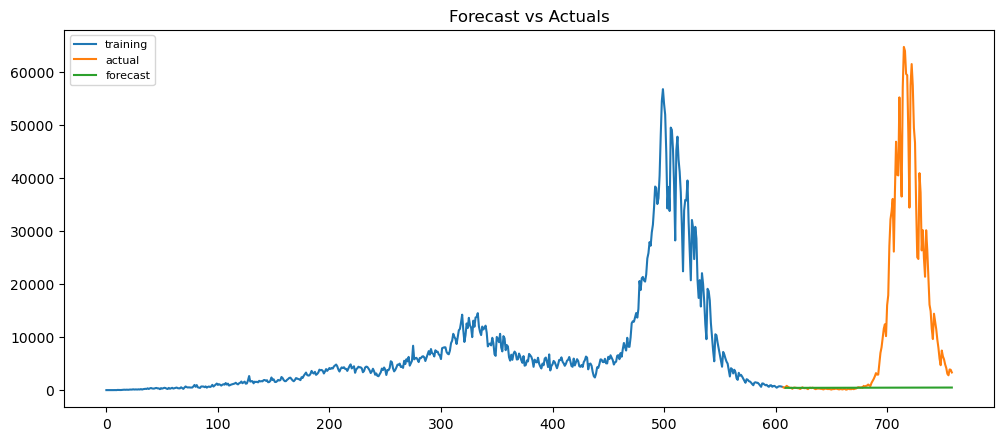

In [41]:
fc_series = pd.Series(a, index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from scipy.stats import shapiro 
from scipy.stats import kstest

In [ ]:
residuals = pd.DataFrame(model_fit1.resid)

In [ ]:
shapiro(residuals)

Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.

# The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series.

It uses the following hypotheses:

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

In [26]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[1])

NameError: name 'residuals' is not defined

In [27]:
# Accuracy metrics
from sklearn.metrics import mean_squared_error
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE
    mse=mean_squared_error(actual,forecast)     #MSE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'MSE':mse,'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(a, test1.New_Positive)

NameError: name 'a' is not defined